In [1]:
#-----------------------------------------------------------------------Lab 2 - Warm up section-------------------------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.util import random_noise
from Functions import *
import itertools
import time

SyntaxError: invalid syntax (Functions.py, line 102)

In [ ]:
axis_font = {'fontname':'Arial', 'size':'16'}
%matplotlib inline

In [ ]:
#in order to load a differant photo cange the path

img_gray = cv.imread("Pictures\\tire.tif", cv.IMREAD_GRAYSCALE)
img_indian = cv.imread("Pictures\\indian.jfif", cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap = 'gray')

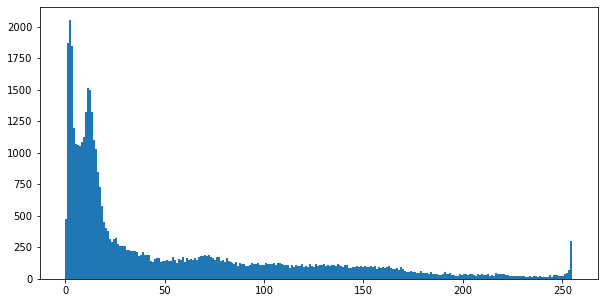

In [4]:

fig, ax = plt.subplots(figsize=[10,5])
ax.hist(img_gray.flatten(), bins = 256,stacked=True) 
plt.show()

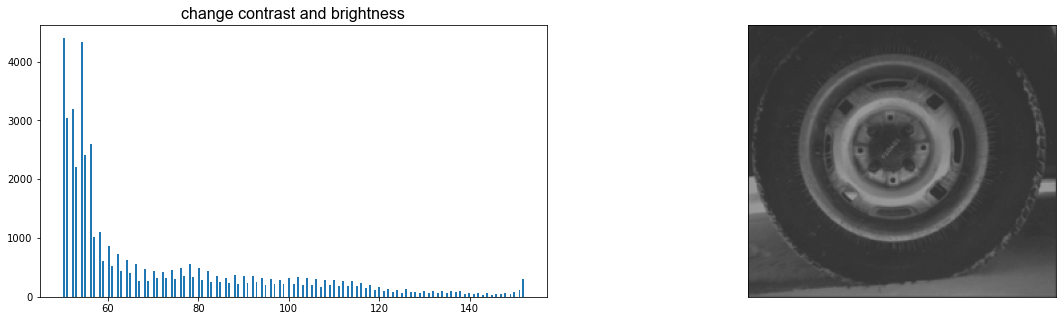

In [5]:
#---------------------------------------------------------------------Lab 1.1 - Warm up section-------------------------------------------------------------------
# 1.1.1
fig, ax = plt.subplots(1,2,figsize=[20,5])
ax[0].set_title('change contrast and brightness',**axis_font)
img_shifted_scaled = ( img_gray* 0.4 + 50).astype('uint8')
ax[0].hist(img_shifted_scaled.flatten(), bins = 256,stacked=True) #, density = False)# , histtype = 'step')
ax[1].imshow(img_shifted_scaled, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

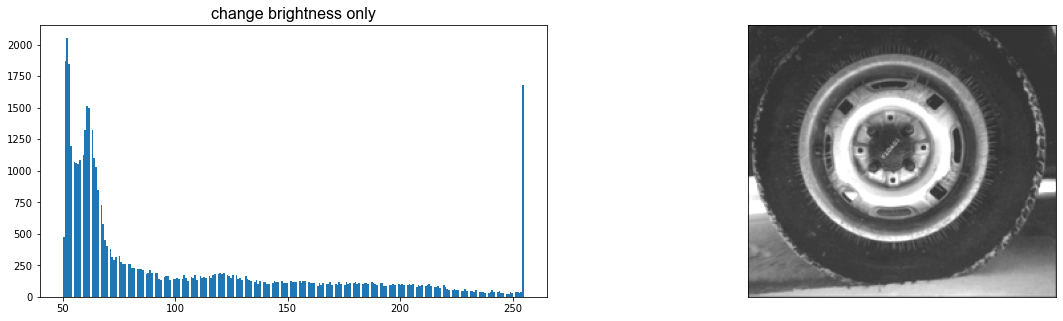

In [6]:
# 1.1.2 
fig, ax = plt.subplots(1,2,figsize=[20,5])
ax[0].set_title('change brightness only',**axis_font)
img_shifted = (np.clip(img_gray.astype('float64') + 50, 0, 255)).astype('uint8')
ax[0].hist(img_shifted.flatten(), bins = 256,stacked=True) 
ax[1].imshow(img_shifted, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

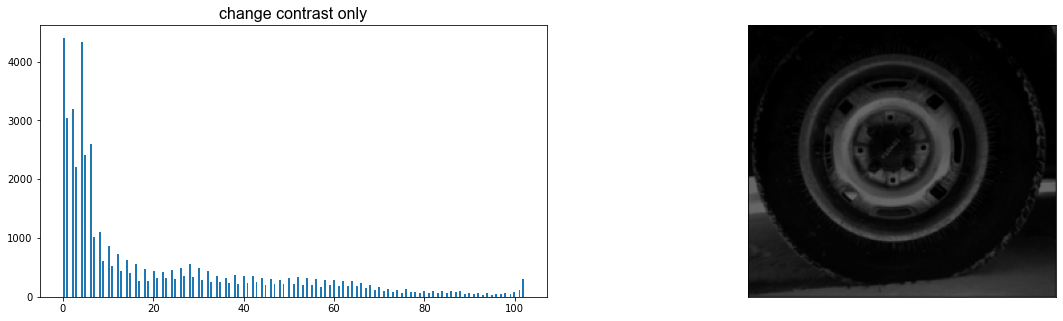

In [7]:
# 1.1.3 
fig, ax = plt.subplots(1,2,figsize=[20,5])
ax[0].set_title('change contrast only',**axis_font)

img_scaled = (img_gray * 0.4).astype('uint8')
ax[0].hist(img_scaled.flatten(), bins = 256,stacked=True) #, density = False)# , histtype = 'step')
ax[1].imshow(img_scaled, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

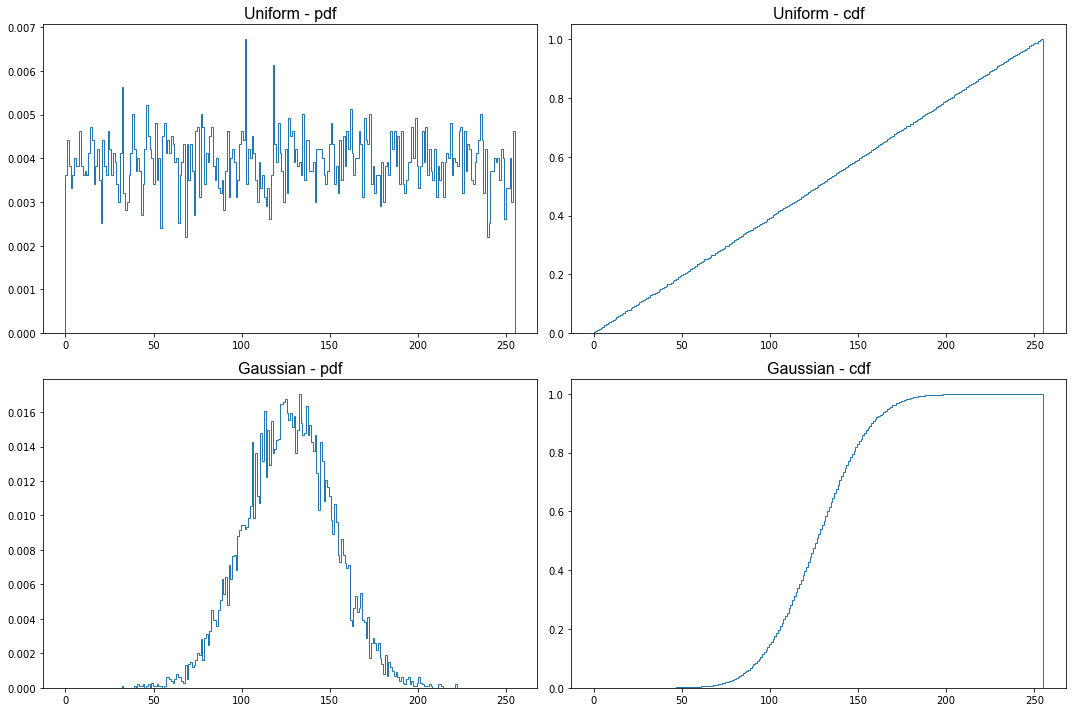

In [8]:
#---------------------------------------------------------------------Lab 1.2 - Warm up section-------------------------------------------------------------------
N = 10000 
uniform_int = np.random.randint(0, 256, size = N)


gaussian = np.random.normal(127.5, 25, N)
fig, axs = plt.subplots(2, 2, figsize=[15,10])
while ((np.min(gaussian) < 0) or (np.max(gaussian) > 255)):
  gaussian = np.random.normal(127.5, 25, N)
 
titles =["Uniform - pdf","Uniform - cdf"]
titles2 =["Gaussian - pdf","Gaussian - cdf"]


for (title1,title2,ax1,ax2,index) in itertools.zip_longest(titles,titles2,axs[0],axs[1],range(1,3)):
  ax1.hist(uniform_int, bins = 256, range = [0, 255], density = index,cumulative=index-1, histtype = 'step')
  ax2.hist(gaussian, bins = 256, range = [0, 255], density = index,cumulative=index-1 ,histtype = 'step')
  ax1.set_title(title1,**axis_font)
  ax2.set_title(title2,**axis_font)


plt.tight_layout()
plt.show()

In [9]:
#---------------------------------------------------------------------Lab 1.3 - Warm up section-------------------------------------------------------------------
#1.3.2-1.3.1
N = 1000 
x = np.random.randint(0, 256, size = N)
tx1= Transform(x)
tx2 = TransformUsingLookup(x)
if (np.array_equal(tx1,tx2)):
     print("They are same")
else :
    print("They are not same")




They are same


In [10]:
#1.3.3
N = 100000000
x = np.random.randint(0,256,size=N)


timeCurrent = time.time()
tx = Transform(x)
timeAfter = time.time()
dt = timeAfter - timeCurrent
print(f"transform time for N = {N} points take {dt} seconds " )

timeCurrent = time.time()
tx2 = TransformUsingLookup(x)
timeAfter = time.time()
dt2 = timeAfter - timeCurrent
print(f"Transform time Using Lookup for N = {N} points take {dt2} seconds " )

dev = dt2 / dt
print(f"time improved by  {dev}")

tx = None
tx2 = None

transform time for N = 100000000 points take 1.9471521377563477 seconds 
Transform time Using Lookup for N = 100000000 points take 0.9029073715209961 seconds 
time improved by  0.46370663802438805


In [11]:
#1.3.4
N = 1000
x = np.random.randint(0, 256, size = N)

signalToEnergy = np.std(x)
xInvers = InverseTransform(Transform(x))
diff_x = x - xInvers
noiseToEnergy = np.std(diff_x)
print(signalToEnergy/noiseToEnergy)

xInvers = InverseTransformUsingLookup(TransformUsingLookup(x))
delta_x = x - xInvers
noiseToEnergy2 = np.std(diff_x)
print(signalToEnergy/noiseToEnergy2)

98.40687587521822
98.40687587521822
